# Mini Projeto: Criação de uma algoritmo de regressão linear simples com o TensorFlow cujo o onjetivo é prever o valor da mediana da base de dados: Boston House Prices Dataset

## Dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

***

# Instalando e Carregando os Pacotes

In [ ]:
#!pip install pydot ----- Pacote que permitirá criar a árvore do grafo computacional do modelo. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

### Baixando os dados

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49082/49082 [==============================] - 0s 5us/step


In [4]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [5]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [6]:
dataset.shape

(506, 14)

In [7]:
# Visualizando os dados
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### Dividindo os dados em TREINO e TESTE

In [9]:
dados_treino = dataset.sample(frac=0.8, random_state=0)
dados_teste = dataset.drop(dados_treino.index)

In [10]:
dados_treino.shape

(405, 14)

In [11]:
dados_teste.shape

(101, 14)

***

# Modelagem Preditiva: REGRESSÃO LINEAR SIMPLES

Na regressão linear simples desejamos modelar a relação entre variável dependente (y) e uma variável independente (x).
    * Váriável independente: "RM"
    * Variável dependente: "MEDV"

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Será criado um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV = f (RM)$ e queremos estimar a função $f()$ usando regressão linear. 

### Representação visual dos dados de treino

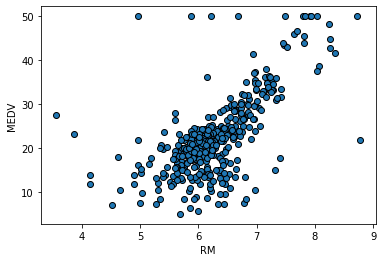

In [13]:
fig, ax = plt.subplots()
x = dados_treino["RM"]
y = dados_treino["MEDV"]
ax.scatter(x,y,edgecolors=(0,0,0))
ax.set_xlabel("RM")
ax.set_ylabel("MEDV")
plt.show()

### Separando o x e y

In [14]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

### Criando o Modelo

Queremos encontrar os parâmetros (W) que permitem prever a saída y a partir da entrada x:

$y=w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial.

*layes.Dense(1, use_bias=True, input_shape=(1,))*

In [16]:
# Função para construir o modelo
def modelo_linear():

    # Criando o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = "layers")])

    # Otimizador
    otimizador = tf.keras.optimizers.Adam(learning_rate= 0.001,
                                         beta_1 = 0.9,
                                         beta_2 = 0.99,
                                         epsilon = 1e-05,
                                         amsgrad = False,
                                         name = "Adam")

    # Compila o modelo
    model.compile(loss = "mse",
                   optimizer = otimizador,
                   metrics = ["mae", "mse"])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [19]:
# Criando modelo
modelo = modelo_linear()

### Plot do modelo

In [20]:
tf.keras.utils.plot_model(modelo, 
                          to_file = 'modelo_TF.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
#!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [22]:
tf.keras.utils.plot_model(modelo,  
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


***

# Treinamento do Modelo

### Hiperparâmetros

In [23]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print(f'Checkpoint salvo a cada {n_samples_save} amostras')

Checkpoint salvo a cada 81000 amostras


### Callback

In [24]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

### Lista para as previsões

In [25]:
predictions_list = []

### Caminho para salvar o checkpoint

In [26]:
checkpoint_path = "dados/"

### Criando um callback que salva os pesos do modelo a cada n_samples_save

In [27]:
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

### Salvando a primeira versão do modelo

In [28]:
# Treinamento
history = modelo.fit(x_treino, y_treino, batch_size= batch_size, epochs= n_epochs, validation_split= 0.1, verbose= 1, callbacks=[earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 5s 508ms/step - loss: 717.9268 - mae: 25.2501 - mse: 717.9268 - val_loss: 820.0435 - val_mae: 26.6422 - val_mse: 820.0435
Epoch 2/4000
2/2 [==============================] - 0s 63ms/step - loss: 717.1801 - mae: 25.2356 - mse: 717.1801 - val_loss: 819.2527 - val_mae: 26.6276 - val_mse: 819.2527
Epoch 3/4000
2/2 [==============================] - 0s 75ms/step - loss: 716.4248 - mae: 25.2210 - mse: 716.4248 - val_loss: 818.4628 - val_mae: 26.6131 - val_mse: 818.4628
Epoch 4/4000
2/2 [==============================] - 0s 95ms/step - loss: 715.6799 - mae: 25.2065 - mse: 715.6799 - val_loss: 817.6730 - val_mae: 26.5985 - val_mse: 817.6730
Epoch 5/4000
2/2 [==============================] - 0s 73ms/step - loss: 714.9244 - mae: 25.1920 - mse: 714.9244 - val_loss: 816.8840 - val_mae: 26.5839 - val_mse: 816.8840
Epoch 6/4000
2/2 [==============================] - 0s 81ms/step - loss: 714.1766 - mae: 25.1774 - mse: 714.1766 - val_loss: 816.0946 

### Métricas do histórico de treinamento

In [29]:
print("keys:", history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


### Retornando os valores desejados para o plot

In [32]:
mse = np.asarray(history.history["mse"])
val_mse = np.asarray(history.history["val_mse"])

### Preparando os alores para o dataframe

In [33]:
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

### Criando o dataframe

In [34]:
steps = pd.RangeIndex(start=0, stop=num_values)
df = pd.DataFrame(values, steps, columns=["Mse em Treino", "MSE em Validação"])

In [35]:
df.head(10)

,Mse em Treino,MSE em Validação
0,717.926758,820.043518
1,717.180115,819.252747
2,716.424805,818.462769
3,715.679871,817.673035
4,714.924377,816.883972
5,714.176575,816.094604
6,713.425903,815.305542
7,712.680908,814.516663
8,711.933350,813.728943
9,711.183960,812.942139


In [36]:
df.tail(10)

,Mse em Treino,MSE em Validação
2174,55.449841,92.098274
2175,55.448818,92.096405
2176,55.447899,92.094986
2177,55.447132,92.095390
2178,55.446011,92.098404
2179,55.445034,92.098915
2180,55.443935,92.097488
2181,55.443344,92.097237
2182,55.441879,92.099983
2183,55.440956,92.102188


### Plot

<AxesSubplot:>

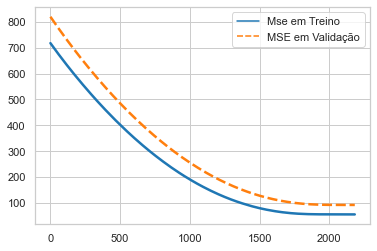

In [38]:
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth= 2.5)

***

# Previsão com o modelo treinado

In [39]:
previsoes = modelo.predict(x_teste).flatten()

4/4 [==============================] - 1s 3ms/step


### Imprimindo as previsões

In [40]:
previsoes

array([21.853146, 20.591572, 23.382614, 22.064968, 21.684937, 21.734776,
       23.694115, 22.367123, 21.93414 , 21.834457, 24.38253 , 23.139645,
       22.043163, 22.781418, 23.052422, 22.217602, 24.977497, 23.102264,
       26.251534, 21.376549, 21.616405, 21.906101, 21.00275 , 21.853146,
       20.88438 , 23.183254, 22.856178, 18.495173, 19.984142, 29.238823,
       22.1553  , 20.507465, 21.40147 , 22.821915, 27.338669, 23.594433,
       22.317284, 25.510162, 24.332691, 27.68132 , 25.288998, 26.855843,
       27.61279 , 19.984142, 22.955856, 23.064884, 20.57288 , 23.20506 ,
       30.26366 , 29.310467, 20.470085, 28.99585 , 27.108158, 24.413681,
       23.251785, 22.821915, 24.522705, 25.41671 , 23.803139, 23.606895,
       23.011929, 20.931107, 23.133415, 22.825027, 21.955944, 21.51361 ,
       22.024471, 22.501068, 22.23629 , 22.189568, 25.005531, 23.862324,
       16.757   , 18.351883, 19.940533, 23.102264, 20.13678 , 20.37975 ,
       23.120953, 22.161533, 21.516727, 24.435486, 

# FIM!